<a href="https://colab.research.google.com/github/SamanvithaBolem/SamanvithaBolem/blob/main/Time_series_office_supplies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SAMANVITHA BOLEM 38110492


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import statsmodels.api as sm
% matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_excel('/content/Superstore.xls')
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
dataset.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
set(dataset['Segment'])

{'Consumer', 'Corporate', 'Home Office'}

In [4]:
set(dataset['Category']) #ategory wise sales analysis

{'Furniture', 'Office Supplies', 'Technology'}

In [8]:
set(dataset['Region'])

{'Central', 'East', 'South', 'West'}

In [9]:
set(dataset['State'])


{'Alabama',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [10]:
set(dataset['Country'])

{'United States'}

### Data Preprocessing

In [5]:
furniture = dataset.loc[dataset['Category'] == 'Furniture']

Office_supplies = dataset.loc[dataset['Category'] == 'Office Supplies']

Technology = dataset.loc[dataset['Category'] == 'Technology']

In [11]:
set(dataset['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

In [12]:
print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


This shows that we have time-series data of 4 years for furniture sales.

In [13]:
furniture = furniture.loc[:,['Order Date','Sales']]

furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


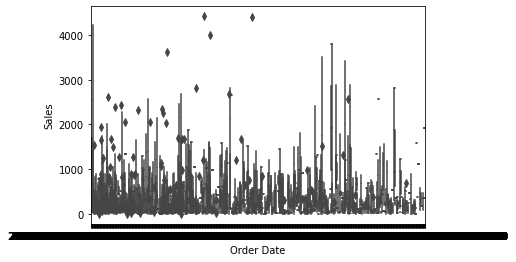

In [14]:
import seaborn as sns
sns.boxplot(x=furniture['Order Date'],
            y=furniture['Sales'])

### **Indexing Time-Series Data**

In [15]:
furniture = furniture.set_index('Order Date')
#furniture = furniture.apply(lambda x: x.set_index('Order Date'))
furniture.index

DatetimeIndex(['2016-11-08', '2016-11-08', '2015-10-11', '2014-06-09',
               '2014-06-09', '2017-07-16', '2015-09-25', '2015-09-17',
               '2015-09-17', '2016-12-08',
               ...
               '2015-11-13', '2016-06-03', '2016-12-12', '2017-06-01',
               '2015-12-14', '2015-03-19', '2016-12-05', '2015-09-06',
               '2014-01-21', '2017-02-26'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [16]:
# Averaging Daily Sales
y = furniture['Sales'].resample('MS').mean()

In [17]:
y['2014']

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014438
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
Freq: MS, Name: Sales, dtype: float64

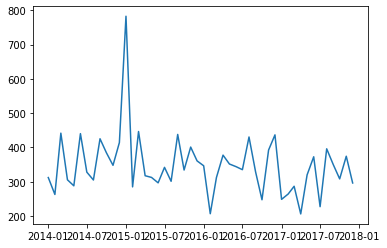

In [18]:
plt.plot(y)

In [20]:
y['2017':]

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

### **Furniture Data Time-series Vizualization**

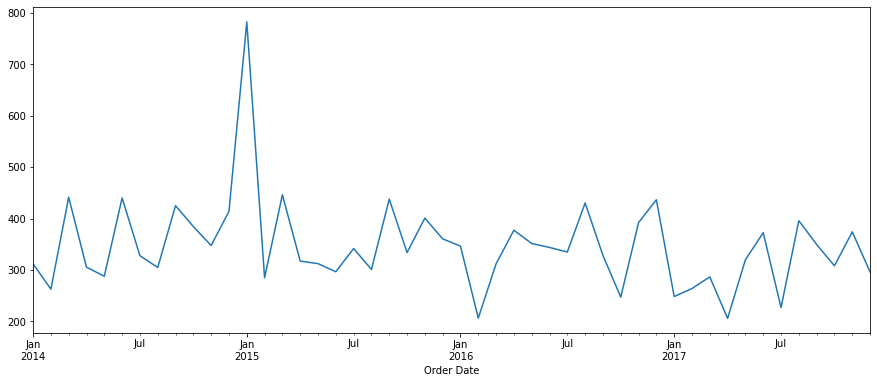

In [21]:
y.plot(figsize=(15, 6))

In [22]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

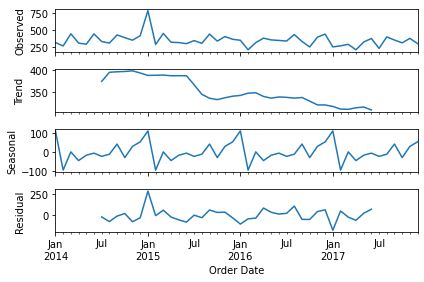

In [23]:
decomposition.plot()
plt.show()

In [24]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, 
                                              order=param, 
                                              seasonal_order=param_seasonal, 
                                              enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:688.3112416991725
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1368.4791236200563
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:426.20464898591723
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:452.8238602501692


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1637.9186184575462
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:295.4464564722349
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:641.1240680666336
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:416.5496453364598


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:455.1411010681077
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:nan


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:297.4464066250116
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:580.6389269639644
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1494.869919340908
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:433.3552136734719
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:437.46040107889746


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1438.7674835409514
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:294.1158452476946
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:538.8964721447178
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2633.256378042578
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:412.8726989905539
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:419.1839792724931
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2617.7229847039575
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:273.40324546364394
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:592.766149874985


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1124.2929642364438
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:427.72411597383274
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:420.41145389920376


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1237.1534253359016
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:273.5840395565931
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:553.2719417804288
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:2601.01780880668
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:418.5261783089086
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:422.4003583322366
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:2536.285810561375
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:275.47757405308687
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:566.5211872508684
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1520.7402162796534
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:430.3305770817938


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:397.3668981651571
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1508.7140309420165
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:273.4415398792927
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:540.6257368397363
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:2588.647762746215
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:414.7726173041288
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:391.83032555468395
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:2589.2400946123503


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:263.937108438126


In [26]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), 
                                  seasonal_order=(1, 1, 0, 12), 
                                  enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9742   6.86e-05   9.22e+07      0.000    6323.974    6323.974


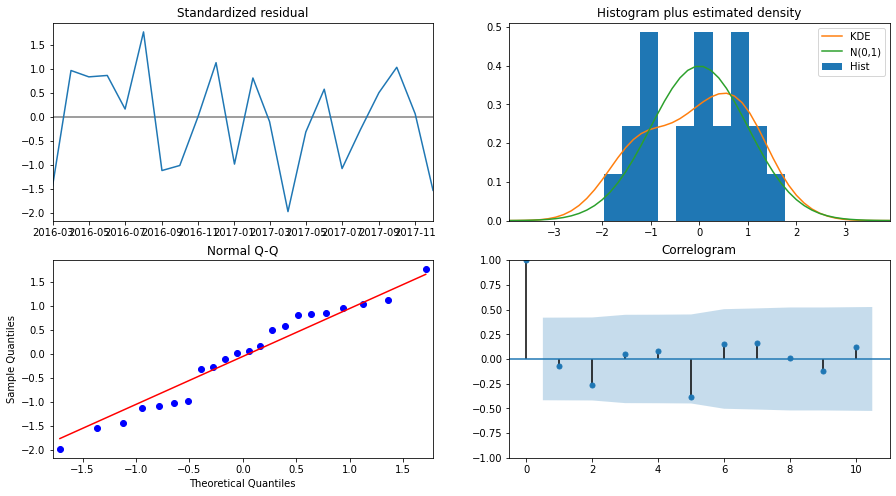

In [27]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()

### **Validating the Model Forecasts**

            lower Sales  upper Sales
Order Date                          
2017-01-01   169.078601   487.339126
2017-02-01    39.270052   357.267694
2017-03-01   135.605705   453.360803
2017-04-01   206.959329   524.489949
2017-05-01   186.670997   503.993258
2017-06-01   167.435191   484.563537
2017-07-01   155.609307   472.556729
2017-08-01   258.666942   575.445168
2017-09-01   150.591733   467.211388
2017-10-01    66.490609   382.961345
2017-11-01   210.978626   527.309242
2017-12-01   261.479887   577.678423


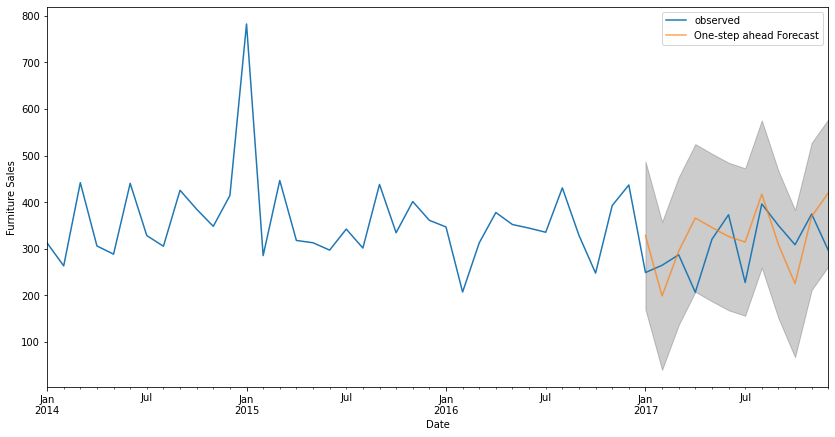

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [29]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 5911.2612


In [30]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 76.88472642635382


### **Future Forecasts**

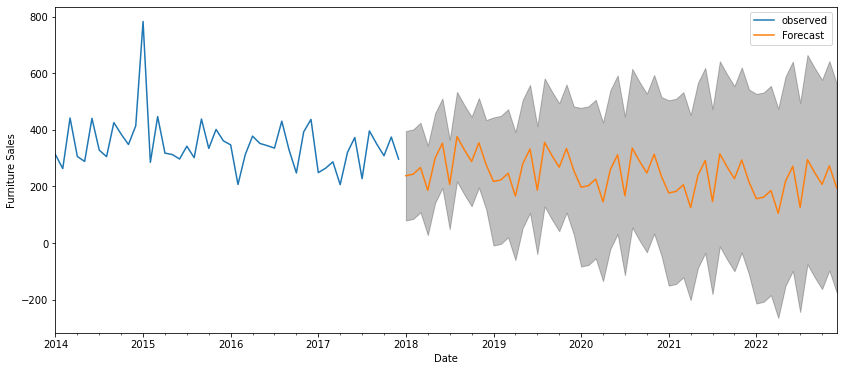

In [31]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

**Furniture vs Office Supplies**

In [32]:
furniture = dataset.loc[dataset['Category'] == 'Furniture']

office = dataset.loc[dataset['Category'] == 'Office Supplies']

technology = dataset.loc[dataset['Category'] == 'Technology']

furniture.shape, office.shape, technology.shape

((2121, 21), (6026, 21), (1847, 21))

In [33]:
technology.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [35]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
technology.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
technology = technology.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
technology = technology.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
y_technology = technology['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
technology = pd.DataFrame({'Order Date': y_technology.index, 'Sales': y_technology.values})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
store = furniture.merge(office, on='Order Date', how='inner') #MERGE
store.rename(columns={'Sales_x': 'Furniture Sales', 'Sales_y': 'Office Sales'}, inplace=True)
store.head()

,Order Date,Furniture Sales,Office Sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


In [37]:
store1 = store.merge(technology, on='Order Date', how='inner')
store1

,Order Date,Furniture Sales,Office Sales,Sales
0,2014-01-01,480.194231,285.357647,449.041429
1,2014-02-01,367.931600,63.042588,229.787143
2,2014-03-01,857.291529,391.176318,2031.948375
3,2014-04-01,567.488357,464.794750,613.028933
4,2014-05-01,432.049188,324.346545,564.698588
5,2014-06-01,695.059242,588.774409,766.905909
6,2014-07-01,601.169500,756.060400,533.608933
7,2014-08-01,457.521656,541.879143,708.435385
8,2014-09-01,992.353367,1015.677704,2035.838133
9,2014-10-01,769.015437,267.078815,596.900900


In [38]:
store1.merge(technology,
             on='Order Date', 
             how='inner')

store1.rename(columns={'Sales_x': 'Furniture Sales', 
                       'Sales_y': 'Office Sales',
                       'Sales_z': 'Technology Sales'}, 
              inplace=True)

store1.head()

,Order Date,Furniture Sales,Office Sales,Sales
0,2014-01-01,480.194231,285.357647,449.041429
1,2014-02-01,367.931600,63.042588,229.787143
2,2014-03-01,857.291529,391.176318,2031.948375
3,2014-04-01,567.488357,464.794750,613.028933
4,2014-05-01,432.049188,324.346545,564.698588


### Visualizing Furniture vs Office Sales time series

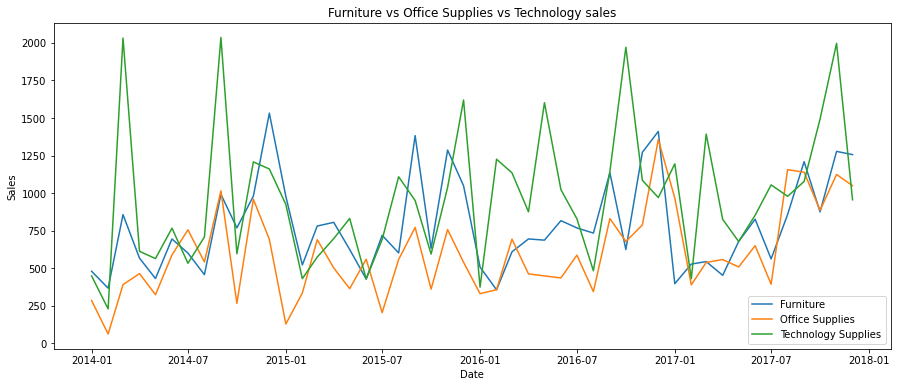

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(store['Order Date'], store['Furniture Sales'], label='Furniture')
plt.plot(store['Order Date'], store['Office Sales'], label='Office Supplies')
plt.plot(store1['Order Date'], store1['Sales'], label='Technology Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies vs Technology sales')
plt.legend()